## Importing the Dataset

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('../datasets/spam.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,3624,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\nthis deal is to ...,0


## Exploratory Data Analysis

In [34]:
df.drop(['Unnamed: 0', 'label'], axis=1, inplace = True)
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [35]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [36]:
df.columns = ['text','label']
df.head()

,text,label
0,Subject: enron methanol ; meter # : 988291\nth...,0
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\nthis deal is to ...,0


In [37]:
# Number and Percentage of Spam and Ham Emails
ham, spam = df['label'].value_counts()
print("No of Ham emails: ", ham)
print("No of Spam emails: ", spam)

No of Ham emails:  3672
No of Spam emails:  1499


## Data Preprocessing

In [38]:
import string
import re
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

In [39]:
def mailprocess(text):
    text = text.replace("Subject:","")
    text = text.replace("we 're", "we are")
    text = text.replace("ect","etc")
    text = text.replace("you 're","you are")
    token_list = text.split()
    text = " ".join([token for token in token_list if not token in set(all_stopwords)])
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['clean_text'] = df['text'].apply(lambda x: mailprocess(x))

### Adding additional features - length and Percentage of punctuation

In [40]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['text_len'] = df['text'].apply(lambda x: len(x) - x.count(" "))
df.head()

,text,label,clean_text,text_len
0,Subject: enron methanol ; meter # : 988291\nth...,0,enron methanol meter follow note ...,261
1,"Subject: hpl nom for january 9 , 2001\n( see a...",0,hpl nom january see attached file ...,75
2,"Subject: neon retreat\nho ho ho , we ' re arou...",0,neon retreat ho ho ho around wonderful tim...,1975
3,"Subject: photoshop , windows , office . cheap ...",1,photoshop windows office cheap main tr...,366
4,Subject: re : indian springs\nthis deal is to ...,0,indian springs deal book teco pvr revenue ...,267


## Data Visualization

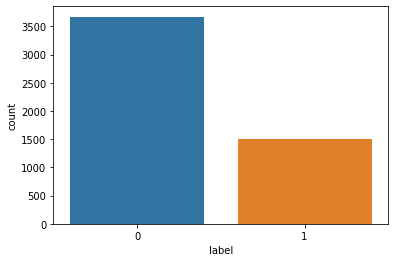

In [41]:
sns.countplot(x='label', data=df);

In [42]:
text_list = df['clean_text'].tolist()
filtered_text = ("").join(text_list) #convert the list into a string of messages

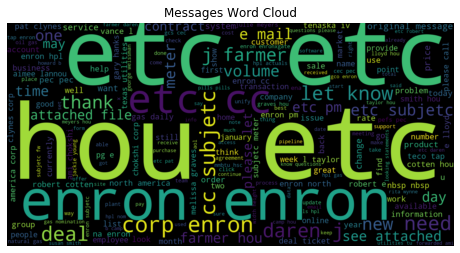

In [50]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=1000, min_font_size=12, margin=0, colormap="viridis").generate(filtered_text)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Messages Word Cloud")
plt.show()

## Vectorization

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
count = vectorizer.fit_transform(df['clean_text'])
print(count.shape)

(5171, 45606)


In [45]:
X = count
y = df['label']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4136, 45606)
(1035, 45606)
(4136,)
(1035,)


## Training Classifier and testing their Performance

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Naive Bayes Classifier

In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train.toarray(), y_train)
y_pred = classifier.predict(X_test.toarray())

# Classification Report
print(classification_report(y_test, y_pred))
print("Naive Bayes Accuracy : {:.2f}% \n".format(accuracy_score(y_test, y_pred) * 100))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       732
           1       0.97      0.90      0.94       303

    accuracy                           0.96      1035
   macro avg       0.96      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035

Naive Bayes Accuracy : 96.33% 



In [49]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[723,   9],
       [ 29, 274]], dtype=int64)